### Herman Ellingsrud / 299803

# GEOF211 - Nummerical modeling 

## Exercise 1 -  The linear avection model

_Note: You are allowed to use Large Language Model (LLM) systems and other material you find online when solving this exercise. However, make sure to cite the tools/material you are using and include a reflection note on how you used it and how it contributed to your learning._

______________________________________________________________________________________________________________________

For all questions (a,b,c,...) in this assignment, use a markdown cell in your code to explain the choices you make to answer the question/prompt. Make sure to comment/annotate your code so that a classmate could understand what is hapening in your code.

______________________________________________________________________________________________________________________

In this exercise we will explore the one-dimensional linear and the non-linear advection equations (Eqs. 1 and 2) and various explicit Euler differentiation schemes. We start with the linear advection equation, which is typically written:

\begin{equation}
    \frac{\partial \theta}{\partial t}=-c\frac{\partial \theta}{\partial x},\, c>0  \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(1)
\end{equation}


where a signal, $\theta(x,t)$, is a function of position, $x$, and time, $t$. $c$ represents a constant advection speed. Note that the property $\theta$ could be temperature, salinity, moisture, wind/current speed, etc.

The exact solution to eq. 1 can be seen as an initial condition $\theta(x,0)=\theta_0(x)$, which is propagating as a wave signal along the x-axis with speed c so that  $\theta(x,t)=\theta_0(x-ct)$. 

______________________________________________________________________________________________________________________

Load neccessary packages

In [2]:
import numpy as np                  # for math
import matplotlib.pyplot as plt     # for plotting

import imageio                      # for making GIF
from IPython.display import Image   # for displaying GIF


______________________________________________________________________________________________________________________

# Exercise 1a.
Design an initial condition that looks like a spike, a box, a rounded spike, or a combination of these (see examples in Figure 1 (in exercise sheet)) and calculate/plot where the signal is at $t=0, t=4\Delta t, t=8\Delta t,$ and $t=20 \Delta t$. You can use the following restrictions and assumptions:


 - Let $x\in [0,L]$ be divided into $J$ equal parts $\Delta x$.
 - For simplicity, you can set $c=1$, $L=100$, $J=100$. 
 - Choose a $\Delta t<1$.
 - Let $\theta(x,t) \in [1,3]$
 - Let $\theta_0(x)$ = 1 everywhere, except for roughly the area $x\in [40,50]$ where you define your initial signal (spike, box,...).
 - Choose a boundary condition that seem appropriate for your initial signal.


______________________________________________________________________________________________________________________

Set the restrictions and assumptions

In [3]:
dt = 0.1                   # Timestep [s]
dx = 1                     # Distance between each x [m]
c = 1                      # Constant advection speed [m/s]
C = c * dt / dx            # Courant number [dimensionless]

n = 100                    # Number of timesteps to run (temporal dimension) 
L = 100                    # Spatial dimension size
J = np.linspace(0, L, 100) # Spatial dimension

times = [0, 4 * dt, 8 * dt, 20 * dt] #The times 

I have varied dt a bit to see the changes it will bring. Ended up at 0.5 because it gave more noticeable changes than 0.1, but then changed back to 0.1 to see the signal at non linear.

I chose dx as 1 to keep it simple.

The task said that c = 1, so I have that.

I forgot a bit that I defined C = c*dt/dx, so I haven't referred to it much, but it's the Courant number. In my case here, C becomes 0.1.

n = 100 to have many timesteps.

L and J were given in the task text and are the size of the grid.

I have also defined which times I want to see the signal.

______________________________________________________________________________________________________________________

Make the signal

$\theta$(x,0) = $\theta_0$(x)

In [18]:
# fixing axes for all plots
def fix_axes(ax, x_lim, y_lim, x_label, y_label):
    ax.set_xlim(x_lim) # putting limits on the x axis
    ax.set_ylim(y_lim) # putting limits on the y axis
    ax.set_xlabel(x_label) # putting label on the x axis
    ax.set_ylabel(y_label) # putting label on the y axis
    return(ax)

<Axes: title={'center': '$\\theta_0$(x)'}, xlabel='Space', ylabel='$\\theta$'>

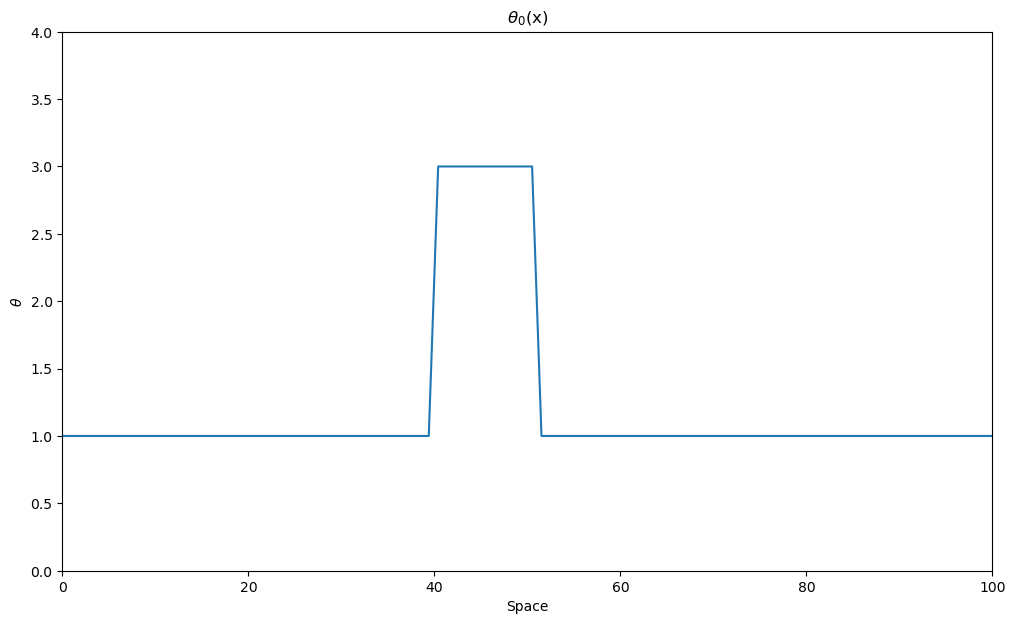

In [5]:
theta_0 = np.ones([L])       # Signal is initially an array of ones with a length L, uses np.ones to make all values one
theta_0[40:51] = 3          # Add a shape (box, spike, rounded spike, etc.), give the signal the value 3 to the x values between 40 and 50.

plt.figure(figsize=[12, 7])                   # Plot shape
plt.title(r'$\theta_0$(x)')
plt.plot(J,theta_0)                         # plots the signal
fix_axes(plt.gca(), (0, L), (0, 4), 'Space', r'$\theta$') #uses the function to make labels and defind the length of the axis.

______________________________________________________________________________________________________________________

Calculate the analytical solution 


In [6]:
# This can be solved with or without a function ...
def Analytical_solution(times):
    analytical_solutions = [] #make a new list to collect analytical solution values
    for t in times:  # iterates over the times given
        theta_analytical = theta_0  #give the same values as the original signal
        theta_analytical_shifted = np.roll(theta_analytical, -int(c * t / dx))  # Shift the array
        analytical_solutions.append(theta_analytical_shifted) #add the new values to the empty list
    return analytical_solutions #return the new values

In [7]:
theta_A = np.ones((len(times), len(J))) #define the theta analytical signal

# Iteration in time
for t_idx, t in enumerate(times): #makes t_idx match the index of the index to the value in times
    # Calculate analytical solution for current time with the function over. 
    theta_A[t_idx] = Analytical_solution([t])[0] 
    
    

______________________________________________________________________________________________________________________

Plot analytical solution - for the 4 timesteps listed in the exercise text

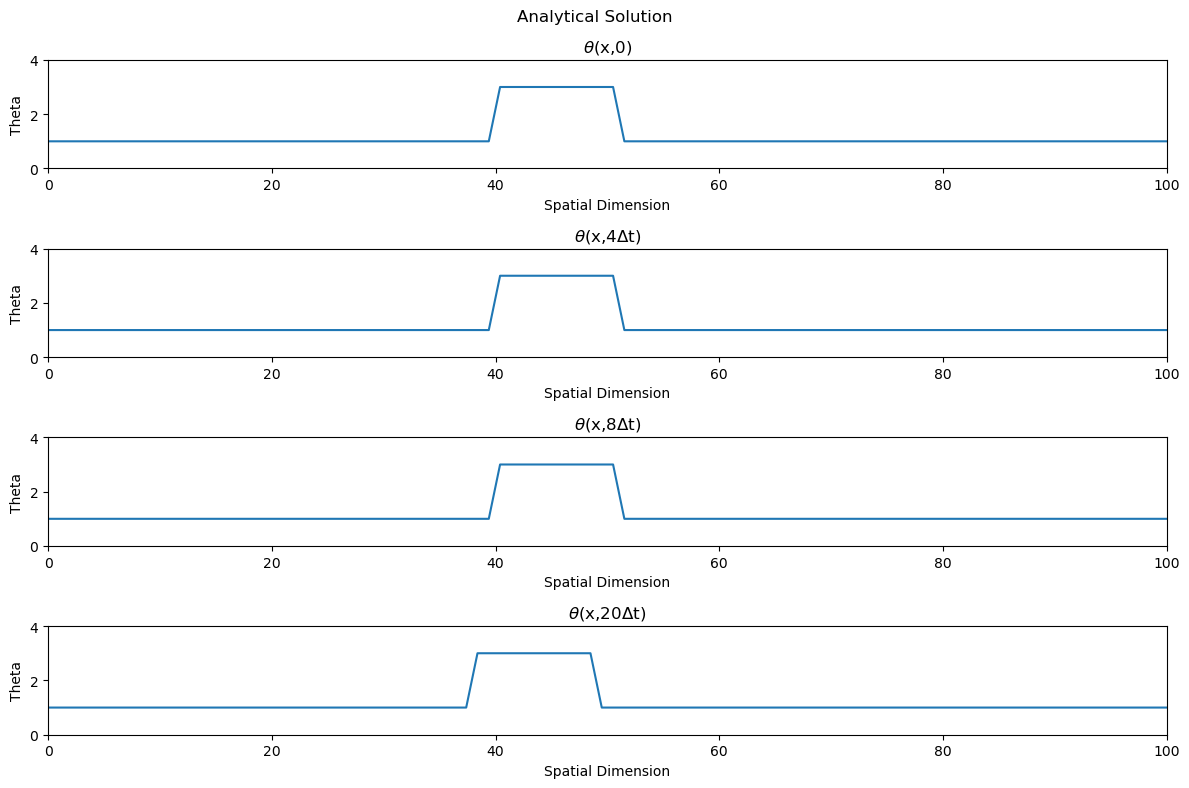

In [8]:
fig = plt.figure(figsize=[12, 8])  # Extra long figure to see the signal clearly
grid = plt.GridSpec(4, 1) 
fig.suptitle('Analytical Solution')

ax = fig.add_subplot(grid[0, 0])
ax.set_title(r'$\theta$(x,0)')  # Theta at t = 0 
ax.plot(J, theta_A[0])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 0])
ax.set_title(r'$\theta$(x,4$\Delta$t)')  # Theta at t = 4 * dt 
ax.plot(J, theta_A[1])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 0])
ax.set_title(r'$\theta$(x,8$\Delta$t)')  # Theta at t = 8 * dt
ax.plot(J, theta_A[2])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 0])
ax.set_title(r'$\theta$(x,20$\Delta$t)')  # Theta at t = 20 * dt
ax.plot(J, theta_A[3])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

plt.tight_layout()
plt.show()

A bigger dt gives a greater shit.

______________________________________________________________________________________________________________________

# Exercise 1b.
Express the advection equation in its difference form when you are using the Euler forward scheme
in time and the Euler backward scheme in space.

FTBS: 

\begin{equation}
   \theta_{j}^{n+1} = \theta_{j}^{n} - \frac{c \Delta t}{\Delta x} (\theta_{j}^{n} - \theta_{j-1}^{n}):\:\:\:\:(2)
\end{equation}

NB: There are many ways to solve this, the example here is not the fastest but the most intuitive

In [9]:
theta_FTBS = np.ones((n, L)) #defines the shape of the signal, where n represents the number of time steps and L represents the number of spatial points. np.ones makes all values 1

# Initial condition
theta_FTBS[0] = theta_0 # make the initial signal equal to the orginal signal

# Iteration in time
for t_idx in range(n-1):
    # Compute the next time step using FTBS scheme
    for j in range(1, L):
        theta_FTBS[t_idx+1,j] = theta_FTBS[t_idx,j] - c * dt / dx * (theta_FTBS[t_idx,j] - theta_FTBS[t_idx,j - 1]) #equation 2
        

______________________________________________________________________________________________________________________

Plot FTBS solution - for the 4 timesteps listed in the exercise text

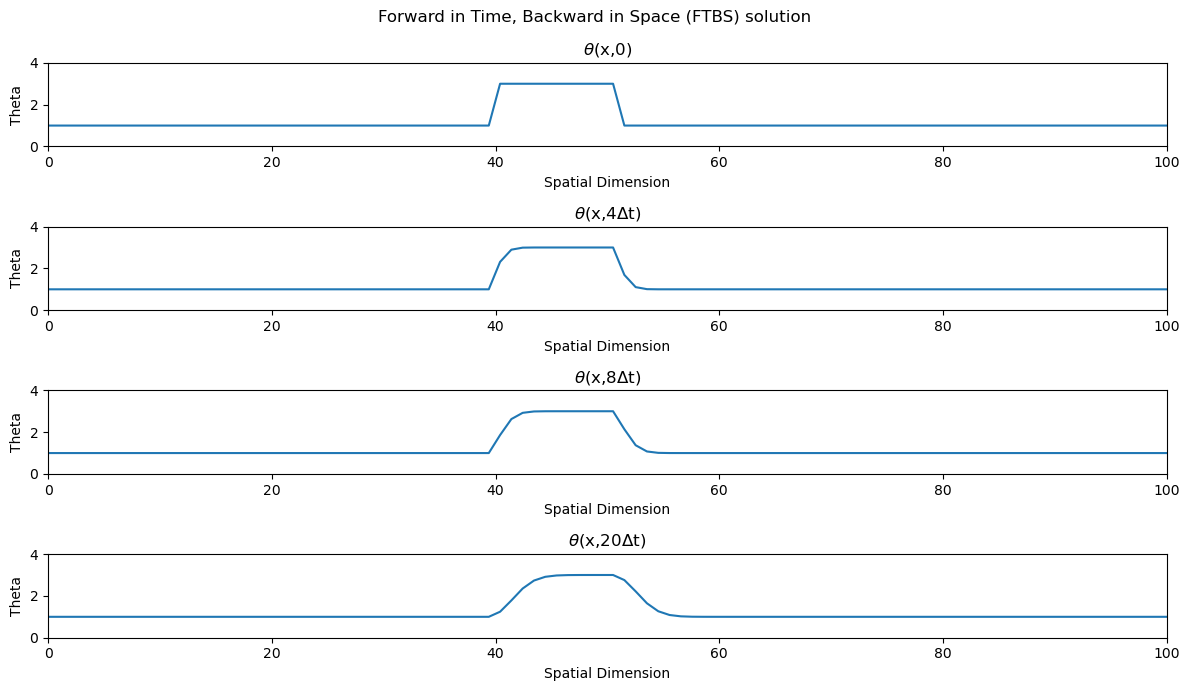

In [10]:
fig = plt.figure(figsize=[12, 7])  # Extra long figure to see the signal clearly
grid = plt.GridSpec(4, 1)  # 4 cells for 4 timesteps (0, 4, 8, 20)
fig.suptitle('Forward in Time, Backward in Space (FTBS) solution')

ax = fig.add_subplot(grid[0, 0])
ax.set_title(r'$\theta$(x,0)')  # Theta at t = 0 
ax.plot(J, theta_FTBS[0,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 0])
ax.set_title(r'$\theta$(x,4$\Delta$t)')  # Theta at t = 4 * dt
ax.plot(J, theta_FTBS[4,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 0])
ax.set_title(r'$\theta$(x,8$\Delta$t)')  # Theta at t = 8 * dt
ax.plot(J, theta_FTBS[8,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 0])
ax.set_title(r'$\theta$(x,20$\Delta$t)')  # Theta at t = 20 * dt
ax.plot(J, theta_FTBS[20,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

plt.tight_layout()
plt.show()

The signal gets less accurate to the original signal the bigger t is.

______________________________________________________________________________________________________________________

# Exercise 1c.
Express the advection equation in its difference form when you are using the Euler forward scheme
in time and the Euler central scheme in space.

FTCS: 

\begin{equation}
    \theta_{j}^{n+1} = \theta_{j}^{n} - \frac{c \Delta t}{2\Delta x} (\theta_{j+1}^{n} - \theta_{j-1}^{n}):\:(3)
\end{equation}

In [11]:
theta_FTCS = np.ones((n, L)) #defines the shape of the signal

# Initial condition
theta_FTCS[0] = theta_0 # make the initial signal equal to the orginal signal

# Iteration in time
for t_idx in range(n-1):
    # Compute the next time step using FTBS scheme
    for j in range(1, L-1):
  
        theta_FTCS[t_idx+1,j] = theta_FTCS[t_idx - 1, j] - c * dt / (2 * dx) * (theta_FTCS[t_idx - 1, j + 1] - theta_FTCS[t_idx - 1, j - 1]) #equation 3


______________________________________________________________________________________________________________________

Plot FTCS solution - for the 4 timesteps listed in the exercise text

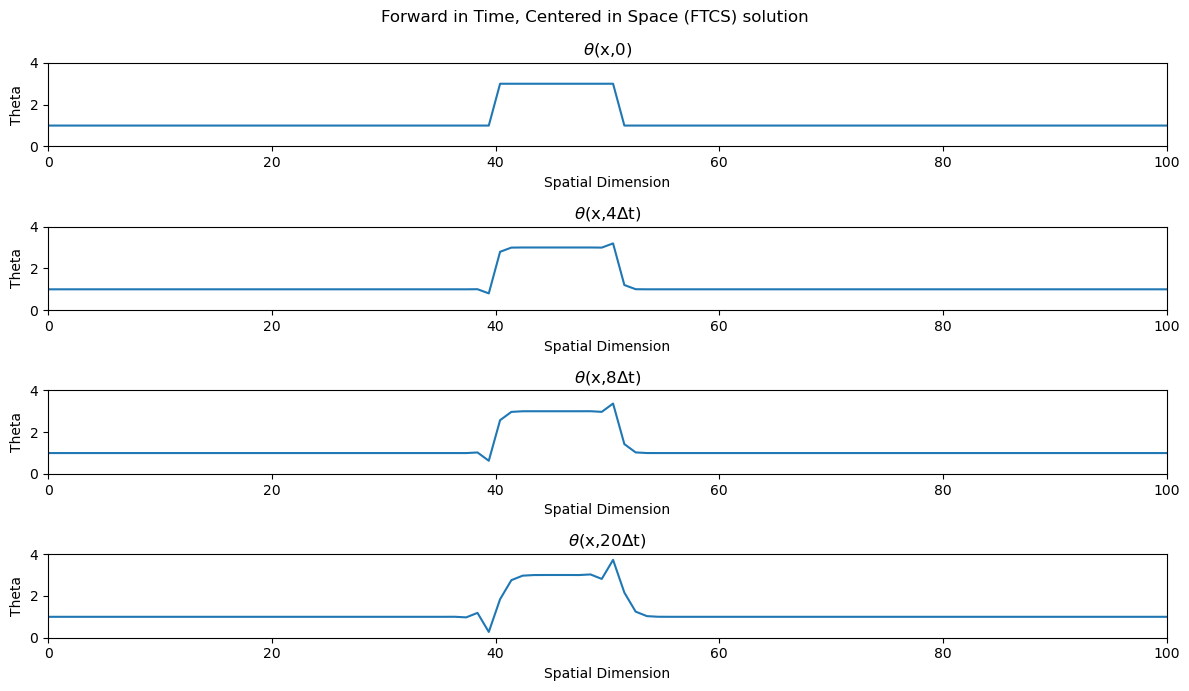

In [12]:
fig = plt.figure(figsize=[12, 7])  # Extra long figure to see the signal clearly
grid = plt.GridSpec(4, 1)  # 4 cells for 4 timesteps (0, 4, 8, 20)
fig.suptitle('Forward in Time, Centered in Space (FTCS) solution')

ax = fig.add_subplot(grid[0, 0])
ax.set_title(r'$\theta$(x,0)')  # Theta at t = 0
ax.plot(J, theta_FTCS[0,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 0])
ax.set_title(r'$\theta$(x,4$\Delta$t)')  # Theta at t = 4 * dt
ax.plot(J, theta_FTCS[4,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 0])
ax.set_title(r'$\theta$(x,8$\Delta$t)')  # Theta at t = 8 * dt
ax.plot(J, theta_FTCS[8,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 0])
ax.set_title(r'$\theta$(x,20$\Delta$t)')  # Theta at t = 20 * dt
ax.plot(J, theta_FTCS[20,:])
fix_axes(ax, (0,L), (0, 4), 'Spatial Dimension', 'Theta')

plt.tight_layout()
plt.show()

A large dt makes this scheme very unstable. also creats values for theta that are not in the original signal, have values outside of [1,3]. 

______________________________________________________________________________________________________________________

# Exercise 1d.
Calculate the numeric solution at $t=4\Delta t$, $t=8\Delta t$, and $t=20 \Delta t$,  for each of these scheme options and plot these together with the inital condition and the exact solution. 

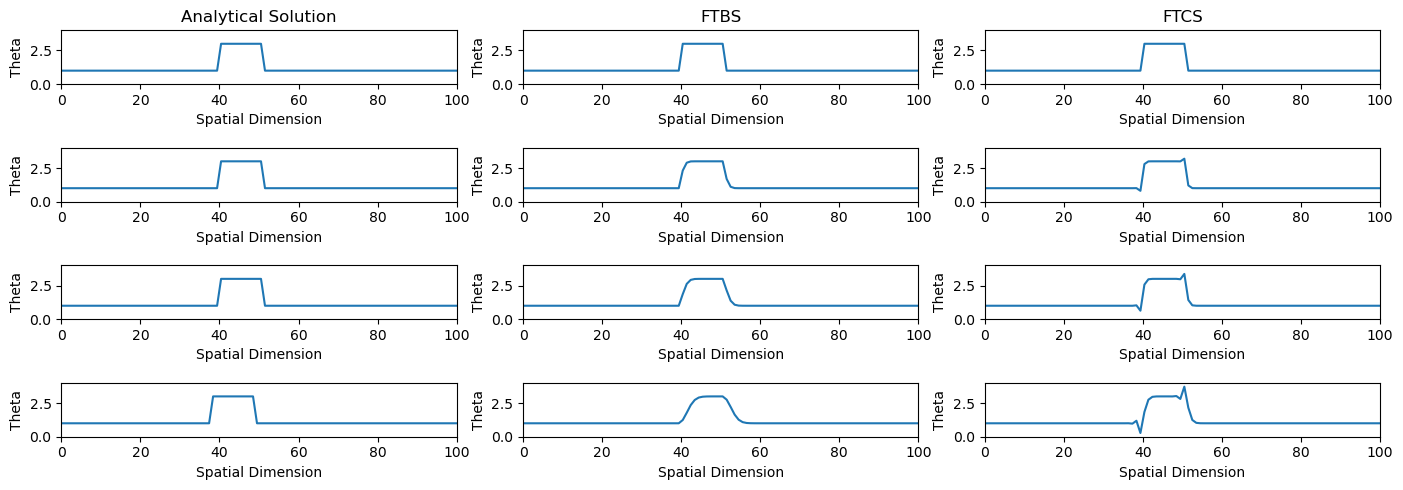

In [13]:
# Plot all three solutions together:

fig = plt.figure(figsize=[14, 5])  # Plot
grid = plt.GridSpec(4, 3)  # 4 timesteps, 3 schemes 

########################### - Analytical solution - ###########################

ax = fig.add_subplot(grid[0, 0])
ax.set_title('Analytical Solution')
ax.plot(J, theta_A[0], label='t = 0')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 0])
ax.plot(J, theta_A[1], label='t = 4*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 0])
ax.plot(J, theta_A[2], label='t = 8*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 0])
ax.plot(J, theta_A[3], label='t = 20*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

############################## - FTBS solution - ##############################

ax = fig.add_subplot(grid[0, 1])
ax.set_title('FTBS')
ax.plot(J, theta_FTBS[0,:], label='t = 0')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 1])
ax.plot(J, theta_FTBS[4,:], label='t = 4*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 1])
ax.plot(J, theta_FTBS[8,:], label='t = 8*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 1])
ax.plot(J, theta_FTBS[20,:], label='t = 20*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

############################## - FTCS solution - ##############################

ax = fig.add_subplot(grid[0, 2])
ax.set_title('FTCS')
ax.plot(J, theta_FTCS[0,:], label='t = 0')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[1, 2])
ax.plot(J, theta_FTCS[4,:], label='t = 4*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[2, 2])
ax.plot(J, theta_FTCS[8,:], label='t = 8*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

ax = fig.add_subplot(grid[3, 2])
ax.plot(J, theta_FTCS[20,:], label='t = 20*dt')
fix_axes(ax, (0, L), (0, 4), 'Spatial Dimension', 'Theta')

plt.tight_layout()
plt.show()

#save the figure ...
fig.savefig('GEOF221_Ex1_fig1',dpi=300, facecolor='w', edgecolor='w', orientation='landscape',format=None,transparent=False,bbox_inches='tight',pad_inches=0.25)

FTBS looks more like the analytical solution than FTCS.

______________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________

# Exercise 1e.

Sketch the domain of dependence for the FTBS and the FTCS shceme.


# ANSWER

hint: use "display(Image(data=open('"domain of dependence".jpg','rb').read(), format='png'))" to show figure if you make/draw it somewhere else

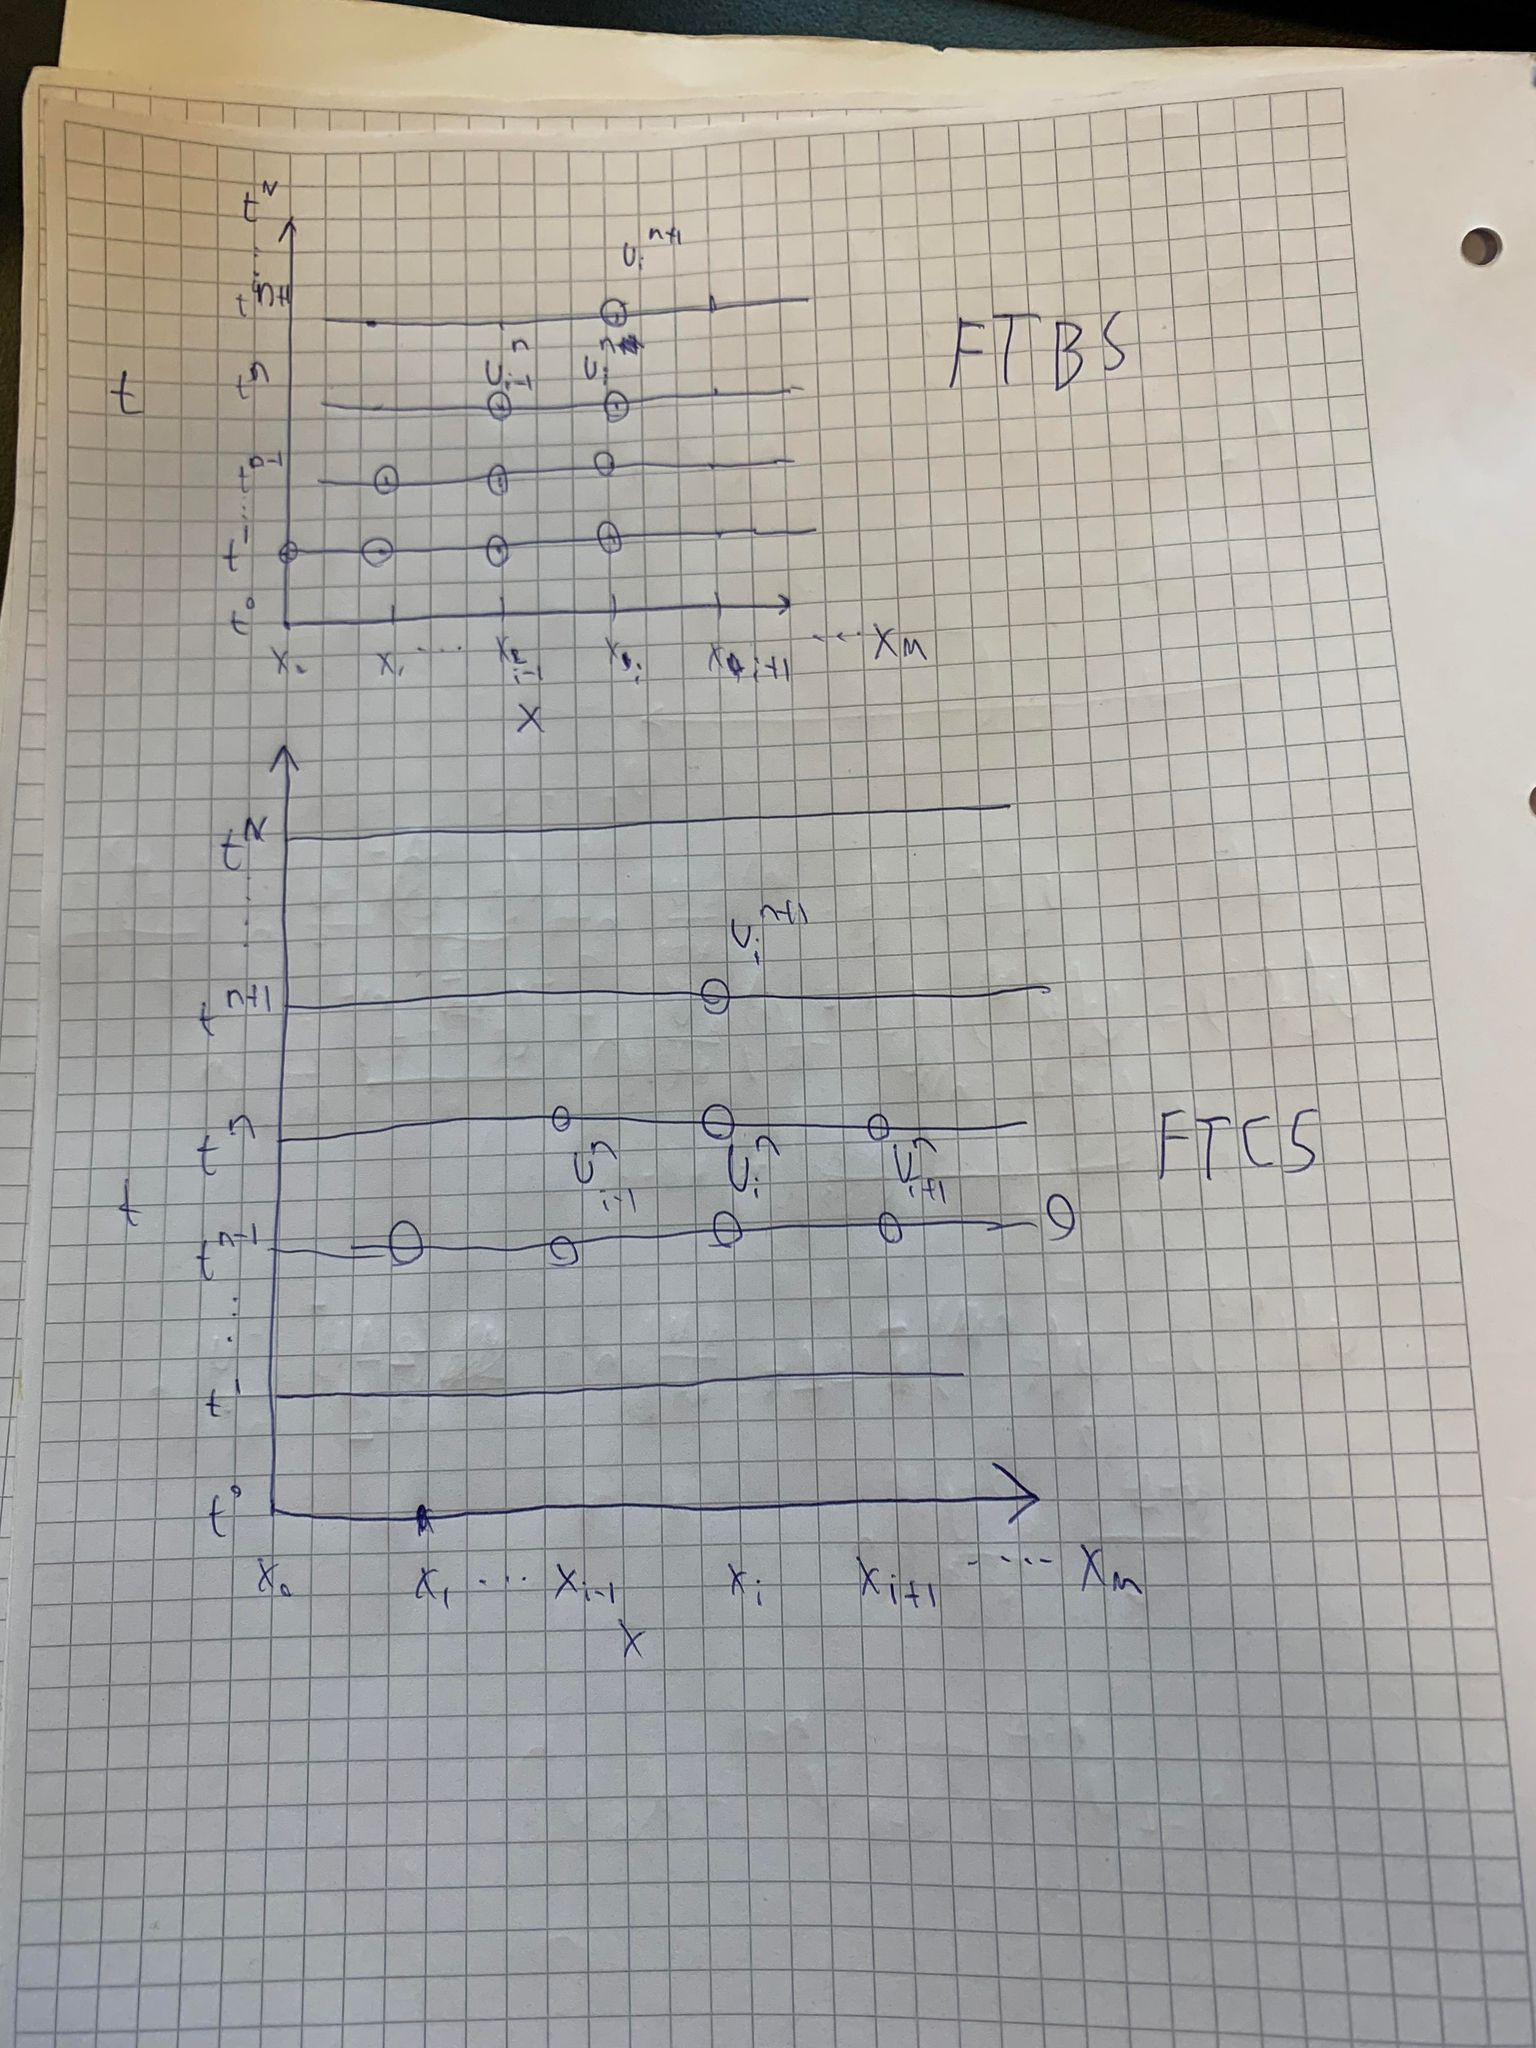

In [14]:
display(Image(data=open('domain of dependence.jpg','rb').read(), format='png'))

______________________________________________________________________________________________________________________

# Exercise 1f.

Discuss the numeric solutions. Which scheme appears to be best suited for this problem? How
could you improve the solutions without changing the differentiation schemes? Are the numerical
errors as expected?

# ANSWER
The FTBS reproduces the original signal more accurate than the FTCS. The FTCS becomes more unstable when t and dt is large.
To improve the solution i could implement the Courant-Friedrichs-Lewy condition. A lower time step will improve the solution, by reducing truncation errors. There is numerical errors in both schemes, but more errors in the central scheme. 

______________________________________________________________________________________________________________________

# Exercise 1g.

So far, you have looked at the linear advection equation, where the advection speed is a constant, $c$. We will now look into the non-linear advection equation, and for simplicity, we replace $\theta$ by $u$ so that we do  not introduce too many variables. The non-linear advection equation is written:

Choose the best configuration you found in solving the linear advection equation, and solve numerically the non-linear advection equation using the same initial condition as you designed in a) (Eq. 2). The non-linear advection equation is given by:  
\begin{equation}
    \frac{\partial u}{\partial t}=-u\frac{\partial u}{\partial x}  \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(2)
\end{equation}
    
where u is the speed along the x-axis. 

Choose the best configuration you found in solving the linear advection equation numerically, and solve numerically the non-linear advection equation using the same initial condition as you designed in a) (Eq. 2). Plot the solution for $t=4\Delta t,\, t=8\Delta t,\, t=20 \Delta t,\, $ and $t=60 \Delta t$. 

In [15]:
# This can be solved with or without a function ...
def FT_S_nonlin(u_0, n, L, dt, dx):
    # Create an array to store the solution
    u_FTBS = np.ones((n, L))
    
    # Initial condition
    u_FTBS[0] = u_0

    # Iteration in time
    for t_idx in range(n-1):
        # Compute the next time step using FTBS scheme with nonlinear advection term
        for j in range(1, L):
            u_FTBS[t_idx+1, j] = u_FTBS[t_idx, j] - u_FTBS[t_idx, j] * dt / dx * (u_FTBS[t_idx, j] - u_FTBS[t_idx, j - 1])
    
    return u_FTBS

In [16]:
u_FTBS = FT_S_nonlin(theta_0, n, L, dt, dx) # using the function i created

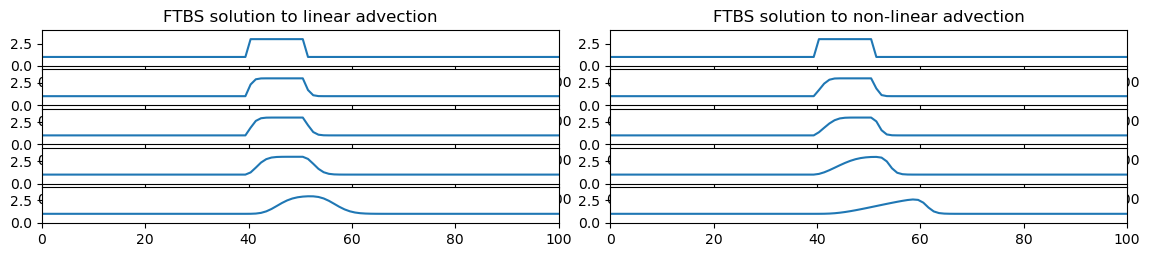

In [17]:
############################## - Solution to linear advection - ##############################

fig = plt.figure(figsize=[14,2.5])
grid = plt.GridSpec(5,2,hspace=0.1,wspace=0.1)

ax = fig.add_subplot(grid[0,0])
ax.set_title('FTBS solution to linear advection')
ax.plot(J, theta_FTBS[0,:])
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[1, 0])
# Theta at t = 4 * dt
ax.plot(J, theta_FTBS[4,:])
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[2, 0])
 # Theta at t = 8 * dt
ax.plot(J, theta_FTBS[8,:])
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[3, 0])
 # Theta at t = 20 * dt
ax.plot(J, theta_FTBS[20,:])
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[4,0])
 # Theta at t = 60 * dt
ax.plot(J, theta_FTBS[60,:])
fix_axes(ax, (0,L), (0, 4), ' ', '')

############################## - Solution to non-linear advection - ##############################

ax = fig.add_subplot(grid[0,1])
ax.set_title('FTBS solution to non-linear advection')
ax.plot(J, u_FTBS[0,:])                                                # t = 0
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[1,1])
ax.plot(J, u_FTBS[4,:])                                                # t = 4 * dt
fix_axes(ax, (0,L), (0, 4), '', '')

ax = fig.add_subplot(grid[2,1])
ax.plot(J, u_FTBS[8,:])                                                # t = 8 * dt
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[3,1])
ax.plot(J, u_FTBS[20,:])                                                # t = 20 * dt
fix_axes(ax, (0,L), (0, 4), ' ', '')

ax = fig.add_subplot(grid[4,1])
ax.plot(J, u_FTBS[60,:])                                                # t = 60 * dt
fix_axes(ax, (0,L), (0, 4), ' ', '')

plt.show()

______________________________________________________________________________________________________________________

# Exercise 1h.

Compare and discuss the solution of the linear and the non-linear advection equation. 

# ANSWER
The linear solution has less change than the non linear solution. Therefore the linear solution recreates the orginal signal better, however it is a more simple solution due to more simplified nature, which tend to have more predictable and stable behavior. The non linear solution would be more realistic, since the real world has not constant parameters. 


______________________________________________________________________________________________________________________

# Exercise 1i.

Reflect on what you learned by doing this assignment. What is your main take-home message?
Was the coding too hard, or just about right? Did you use any resources online that made it
easier/possible to get your code to work, or that gave you insight on the numerical processes you
studied here?

# ANSWER
I have learned about different types of schemes. How different schemes produce different solutions. How the different domain of depencens are. The differences between linear and non linear solutions. My main take-home message is that different schemes have different solutions, and one shold choose the scheme based on the problem at hand. The coding was about right. It was a little difficult to work in both time and space at the same time, I am not so experienced with using multiple for loops. I used chatGPT to solve errors in my code and to check if my code was on right track. 

______________________________________________________________________________________________________________________